In [1]:
# ## Môi trường lập trình
# from google.colab import drive
# drive.mount("/content/drive", force_remount = True)


In [1]:
folder = "C:\\Users\\JOinme\\Downloads\\ML\\Data"
folderModel = "C:\\Users\\JOinme\\Downloads\\ML\\Model"

In [3]:
# !pip install pyclustering

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib as jlb
from pyclustering.cluster.bang import bang, bang_visualizer, bang_animator
import time
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

%matplotlib inline

# Đọc dữ liệu

In [3]:
customer_geo_pca = pd.read_csv(folder + "\\pca.csv").drop('Unnamed: 0', axis = 1)
customer_geo = pd.read_csv(folder + '\\customer_geo.csv').drop('Unnamed: 0', axis = 1)

# BANG-clustering

## Evaluation 1 - Default Parameters

In [113]:
# Create instance of BANG algorithm.
bang_eval1 = bang(customer_geo_pca.values, levels = 11, ccore=True, metric = 'Euclidean')


start_time = time.time()  # Record start time
bang_eval1.process()
end_time = time.time()  # Record end time

# Calculate and print the elapsed time
elapsed_time = end_time - start_time
print(f"Time taken for bang_instance.process(): {elapsed_time:.6f} seconds")

Time taken for bang_instance.process(): 16.771132 seconds


In [114]:
#Save model
# jlb.dump(bang_eval1, folderModel + '\\bang_eval1.pkl')

['C:\\Users\\JOinme\\Downloads\\ML\\Model\\bang_eval1.pkl']

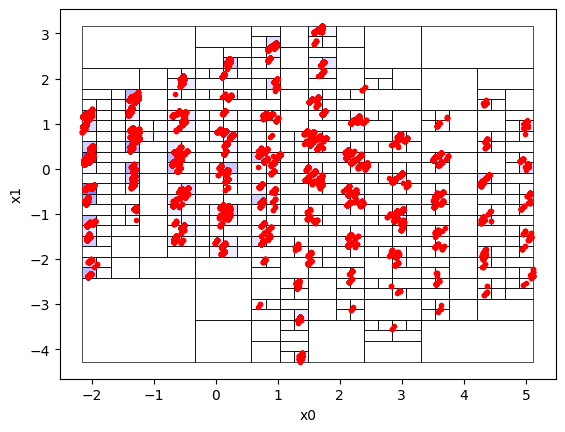

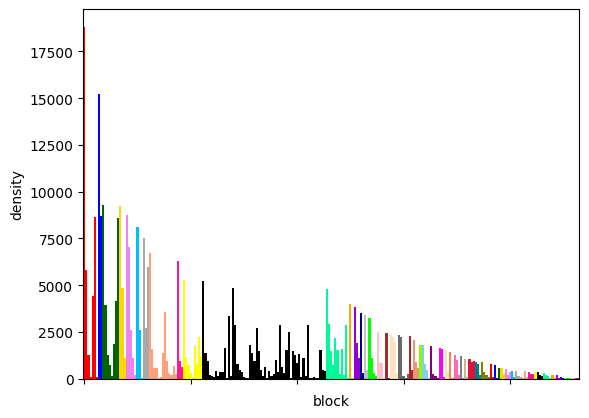

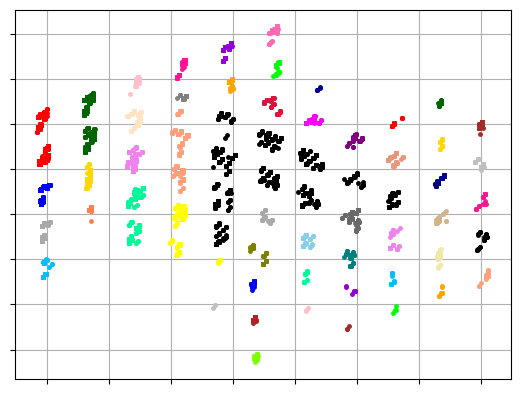

CPU times: total: 34.3 s
Wall time: 35.3 s


In [115]:
%%time
#Obtain clustering results.
clusters_eval1 = bang_eval1.get_clusters()
noise_eval1 = bang_eval1.get_noise()
directory_eval1 = bang_eval1.get_directory()
dendrogram_eval1 = bang_eval1.get_dendrogram()
# Visualize BANG clustering results.
bang_visualizer.show_blocks(directory_eval1)
bang_visualizer.show_dendrogram(dendrogram_eval1)
bang_visualizer.show_clusters(customer_geo_pca.values, clusters_eval1, noise_eval1)

Get clusters of each patterns

In [116]:
cluster_dict = {}
for cluster_id, cluster in enumerate(clusters_eval1):
    for item_id in cluster:
        cluster_dict[item_id] = cluster_id

for index, clusters in cluster_dict.items():
  customer_geo.loc[index, 'cluster_eval1'] = clusters

## Evaluation 2 - Hyperparameter Tuning

### Tuning "levels"

In [139]:
silhouette_scores = []
for level in range(9, 14):
  bang_instance = bang(customer_geo_pca.values, levels = level, ccore=True)
  bang_instance.process()
  pca_tuning = customer_geo_pca
  clusters = bang_instance.get_clusters()
  cluster_dict = {}
  for cluster_id, cluster in enumerate(clusters):
      for item_id in cluster:
          cluster_dict[item_id] = cluster_id

  # Thêm cột 'cluster' vào dataframe dựa trên item_id
  for index, clusters in cluster_dict.items():
    pca_tuning.loc[index, 'cluster'] = clusters
  labels = np.array(pca_tuning['cluster'])
  score = silhouette_score(pca_tuning, labels)
  print(f"Silhouette Score with level {level}: {score}")
  silhouette_scores.append(score)


Silhouette Score with level 9: 0.4552872141677654
Silhouette Score with level 10: 0.03997693374118521
Silhouette Score with level 11: 0.48289437995381745
Silhouette Score with level 12: 0.7530220113339056
Silhouette Score with level 13: 0.7791480940011202


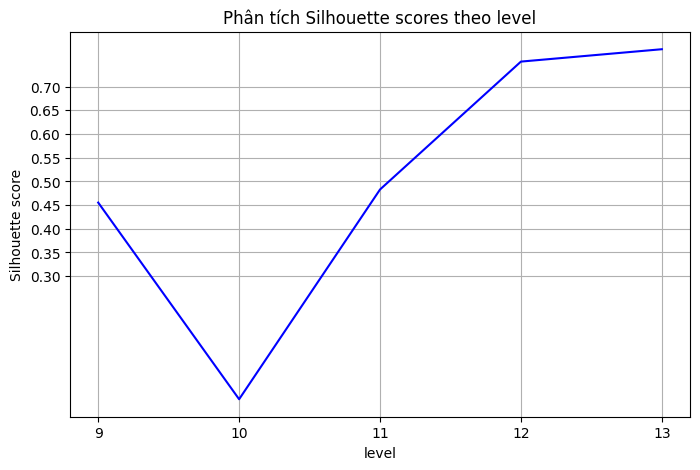

In [151]:
level = [i for i in range(9, 14)]
plt.figure(figsize = (8, 5))
plt.plot(level, silhouette_scores, 'bo-')
plt.xlabel('level')
plt.ylabel('Silhouette score')
plt.yticks(np.arange(0.3, 0.75, 0.05))
plt.xticks(level)
plt.title('Phân tích Silhouette scores theo level')
plt.grid()
plt.show()

### Tuning "amount_threshold"


In [142]:
# Assuming bang, df, and customer_geo are defined elsewhere
silhouette_scores_amount = []
amount_threshold = np.arange(0, 50, 1)  

for amount in amount_threshold:
    # Initialize the bang instance
    bang_instance = bang(customer_geo_pca.values, levels=10, ccore=True, amount_threshold=amount)
    bang_instance.process()
    
    # Process clusters and calculate silhouette score
    pca_tuning = customer_geo_pca
    clusters = bang_instance.get_clusters()
    cluster_dict = {}

    for cluster_id, cluster in enumerate(clusters):
        for item_id in cluster:
            cluster_dict[item_id] = cluster_id

    # Add 'cluster' column to the dataframe based on item_id
    for index, cluster_id in cluster_dict.items():
        pca_tuning.loc[index, 'cluster'] = cluster_id
        
    pca_tuning = pca_tuning.dropna()
    labels = np.array(pca_tuning['cluster'])
    score = silhouette_score(pca_tuning, labels)
    print(f"Silhouette Score with threshold {amount:.1f}: {score}")
    silhouette_scores_amount.append(score)


Silhouette Score with threshold 0.0: 0.2767544113588558
Silhouette Score with threshold 1.0: 0.3955922821591349
Silhouette Score with threshold 2.0: 0.3955922821591349
Silhouette Score with threshold 3.0: 0.28816770065512076
Silhouette Score with threshold 4.0: 0.3684608197387407
Silhouette Score with threshold 5.0: 0.3684608197387407
Silhouette Score with threshold 6.0: 0.3684608197387407
Silhouette Score with threshold 7.0: 0.3684608197387407
Silhouette Score with threshold 8.0: 0.3684608197387407
Silhouette Score with threshold 9.0: 0.3684608197387407
Silhouette Score with threshold 10.0: 0.3684608197387407
Silhouette Score with threshold 11.0: 0.3684608197387407
Silhouette Score with threshold 12.0: 0.3684608197387407
Silhouette Score with threshold 13.0: 0.3684608197387407
Silhouette Score with threshold 14.0: 0.3684608197387407
Silhouette Score with threshold 15.0: 0.3684608197387407
Silhouette Score with threshold 16.0: 0.3684608197387407
Silhouette Score with threshold 17.0: 0.

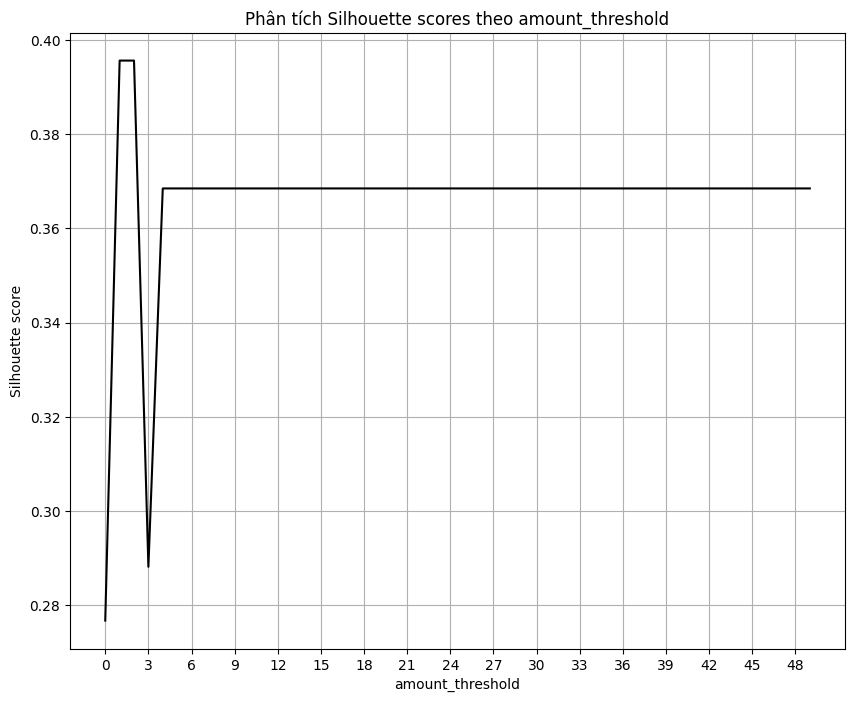

In [145]:
plt.figure(figsize = (10, 8))
plt.plot(amount_threshold, silhouette_scores_amount, 'k-')
plt.xlabel('amount_threshold')
plt.ylabel('Silhouette score')
plt.xticks(np.arange(0, 50, 3))
plt.title('Phân tích Silhouette scores theo amount_threshold')
plt.grid()
plt.show()

### Tuning "density_threshold"

In [162]:
# Assuming bang, df, and customer_geo are defined elsewhere

silhouette_scores_density = []
density_threshold = np.arange(0.0, 1, 0.1)  

for thresh in density_threshold:
    # Initialize the bang instance
    bang_instance = bang(customer_geo_pca.values, levels=10, ccore=True, density_threshold = thresh)
    bang_instance.process()
    
    # Process clusters and calculate silhouette score
    pca_tuning = customer_geo_pca
    clusters = bang_instance.get_clusters()
    cluster_dict = {}

    for cluster_id, cluster in enumerate(clusters):
        for item_id in cluster:
            cluster_dict[item_id] = cluster_id

    # Add 'cluster' column to the dataframe based on item_id
    for index, cluster_id in cluster_dict.items():
        pca_tuning.loc[index, 'cluster'] = cluster_id
        
    pca_tuning = pca_tuning.dropna()
    labels = np.array(pca_tuning['cluster'])
    score = silhouette_score(pca_tuning, labels)
    print(f"Silhouette Score with density {thresh:.1f}: {score}")
    silhouette_scores_density.append(score)


Silhouette Score with density 0.0: 0.3684608197387407
Silhouette Score with density 0.1: 0.3684608197387407
Silhouette Score with density 0.2: 0.3684608197387407
Silhouette Score with density 0.3: 0.3684608197387407
Silhouette Score with density 0.4: 0.3684608197387407
Silhouette Score with density 0.5: 0.3684608197387407
Silhouette Score with density 0.6: 0.3684608197387407
Silhouette Score with density 0.7: 0.3684608197387407
Silhouette Score with density 0.8: 0.3684608197387407
Silhouette Score with density 0.9: 0.3684608197387407


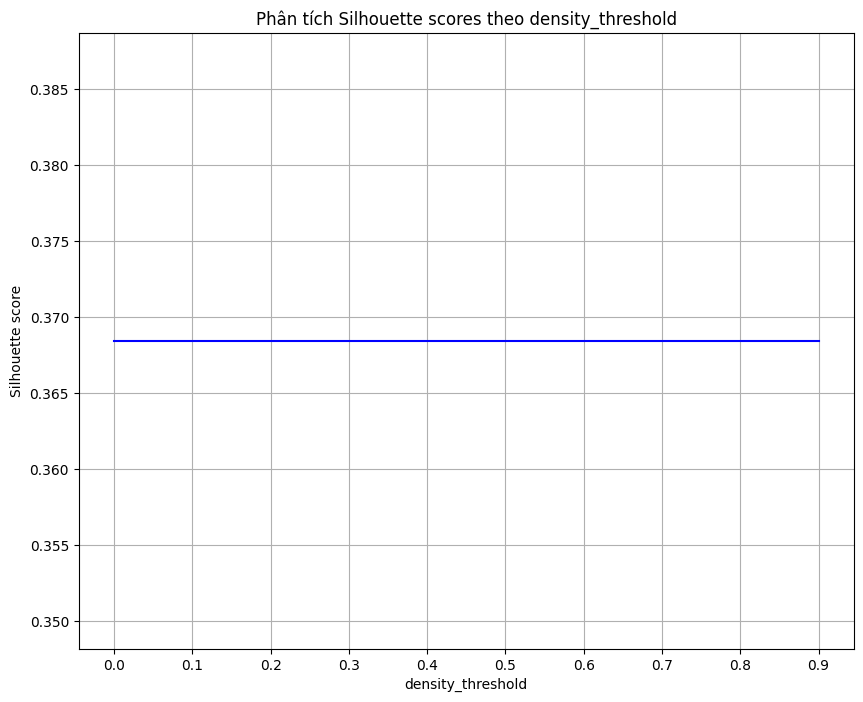

In [164]:
plt.figure(figsize = (10, 8))
plt.plot(density_threshold, silhouette_scores_density, 'b-')
plt.xlabel('density_threshold')
plt.ylabel('Silhouette score')
plt.xticks(density_threshold)
plt.title('Phân tích Silhouette scores theo density_threshold')
plt.grid()
plt.show()

## Clustering After Tuning

### Clustering after tuning

In [182]:
# Create instance of BANG algorithm.
bang_final = bang(customer_geo_pca.values, levels = 10, ccore=True, amount_threshold=2)
bang_final.process()

In [183]:
jlb.dump(bang_final, folderModel + "\\bang_finish.pkl")

['C:\\Users\\JOinme\\Downloads\\ML\\Model\\bang_finish.pkl']

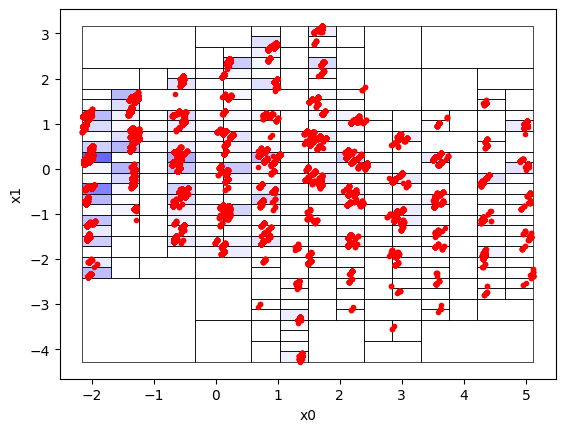

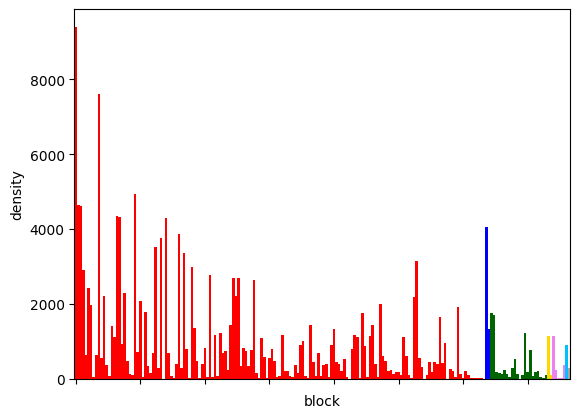

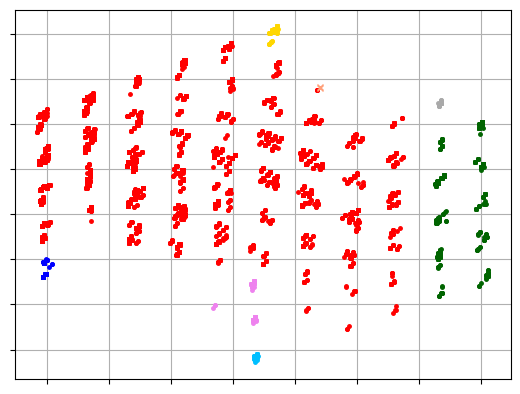

CPU times: total: 34.4 s
Wall time: 35.1 s


In [184]:
%%time
#Obtain clustering results.
clusters_final = bang_final.get_clusters()
noise_final = bang_final.get_noise()
directory_final = bang_final.get_directory()
dendrogram_final = bang_final.get_dendrogram()
# Visualize BANG clustering results.
bang_visualizer.show_blocks(directory_final)
bang_visualizer.show_dendrogram(dendrogram_final)
bang_visualizer.show_clusters(customer_geo_pca.values, clusters_final, noise_final)

In [185]:
#Get cluster of patterns after hyperparameter tuning
cluster_dict_final = {}
for cluster_id, cluster in enumerate(clusters_final):
    for item_id in cluster:
        cluster_dict_final[item_id] = cluster_id

for index, clusters in cluster_dict_final.items():
  customer_geo.loc[index, 'cluster_final'] = clusters

### Time Measurement

In [189]:
dataset_size = np.arange(100, customer_geo.shape[0], 1000)
time_taken_raw = []
time_taken_final = []
for size in dataset_size: 
  ##Get time of BANG-clustering before hyperparameter tuning
  raw_start = time.time()
  bang_raw = bang(customer_geo_pca.values, levels = 11, ccore=True)
  bang_raw.process()
  raw_end = time.time()
  time_taken_raw.append(raw_end - raw_start)
  
  ##Get time of BANG-clustering after hyperparameter tuning
  final_start = time.time()
  bang_final = bang(customer_geo_pca.values, levels = 10, ccore=True, amount_threshold=2)
  bang_final.process()
  final_end = time.time()
  time_taken_final.append(final_end - final_start)


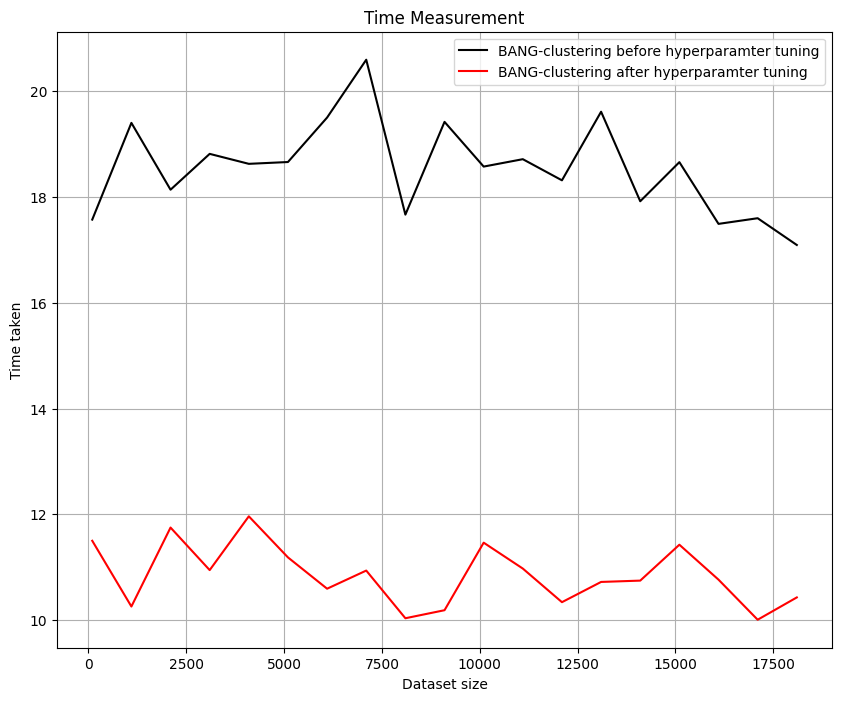

In [191]:
plt.figure(figsize = (10, 8))
plt.plot(dataset_size, time_taken_raw, 'k-', label = 'BANG-clustering before hyperparamter tuning')
plt.plot(dataset_size, time_taken_final, 'r-', label = 'BANG-clustering after hyperparamter tuning')
plt.legend()
plt.xlabel('Dataset size')
plt.ylabel('Time taken')
plt.title('Time Measurement')
plt.grid()
plt.show()

### Silhouette Score

In [192]:
score_eval1 = silhouette_score(customer_geo_pca, customer_geo['cluster_eval1'])
score_final = silhouette_score(customer_geo_pca, customer_geo['cluster_final'])

print("Average silhouette score before hyperparameter tuning:", score_eval1)
print("Average silhouette score after hyperparamter tuning:", score_final)

Average silhouette score before hyperparameter tuning: 0.48289437995381745
Average silhouette score after hyperparamter tuning: 0.033038275702864564
